# Sanremo song contest 2024 : Sentiment Analysis
For this project we will upload all the songs of the Festival of Sanremo 2024 and we will perform a rapid analysis of the text and then we will run a sentiment analysis.

## 1. Import packages and data

In [16]:
import random
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import pandas as pd
from collections import Counter

from transformers import pipeline, AutoTokenizer

import os, glob
import matplotlib.pyplot as plt


In [17]:
import nltk
print(nltk.__version__)

3.8.1


In [18]:
# download NLTK
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zaccaria/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/zaccaria/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
# defining root 
root = "testi/"

In [20]:
# List all text files in the directory
files = glob.glob(root + "*.txt")
print("Number of files:", len(files))

Number of files: 30


In [21]:
# Read all texts from the files
texts = []
for file in files:
    with open(file, "r") as f:
        texts.append(f.read().replace("’", "'").replace("\n", " "))

## 2. EDA

### 2.1 Preprocessing

In [22]:
# Tokenize Italian texts and remove punctuation, stopwords, and lowercase the tokens
stop_words = set(stopwords.words('italian'))
tokens = []
for text in texts:
    words = word_tokenize(text.lower())
    ts = [word for word in words if word.isalnum() and word not in stop_words]
    tokens.extend(ts)

In [23]:
#Remove short words
tokens = [token for token in tokens if len(token) > 3]

### 2.2 Word Counts

In [26]:
# Calculate word count
word_counts = Counter(tokens)



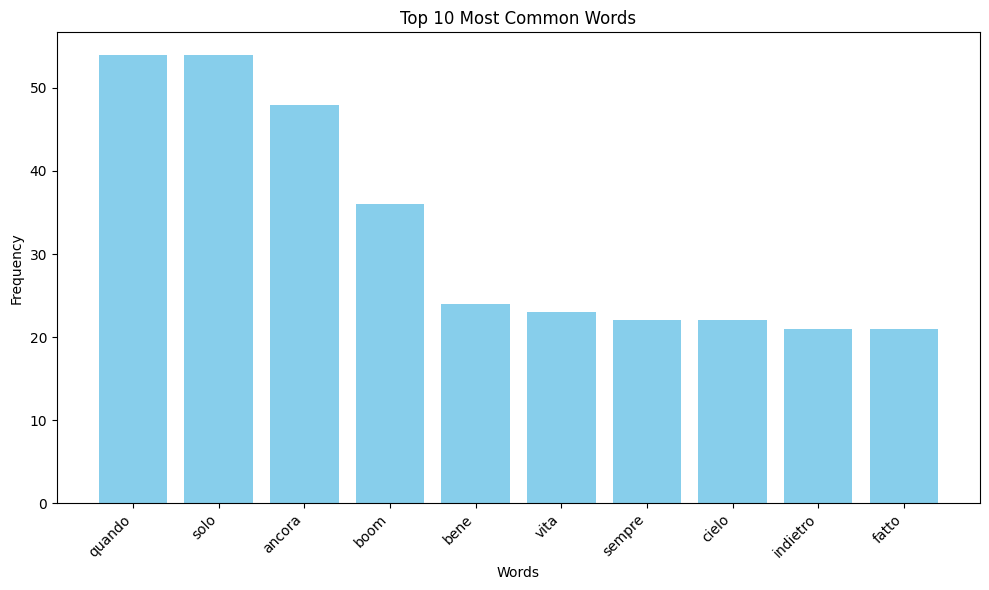

In [27]:
# Get the most common words and their frequencies
most_common_words = word_counts.most_common(10)  # Change 10 to the desired number of common words

# Extract words and frequencies
words, frequencies = zip(*most_common_words)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### 2.3 WordCloud

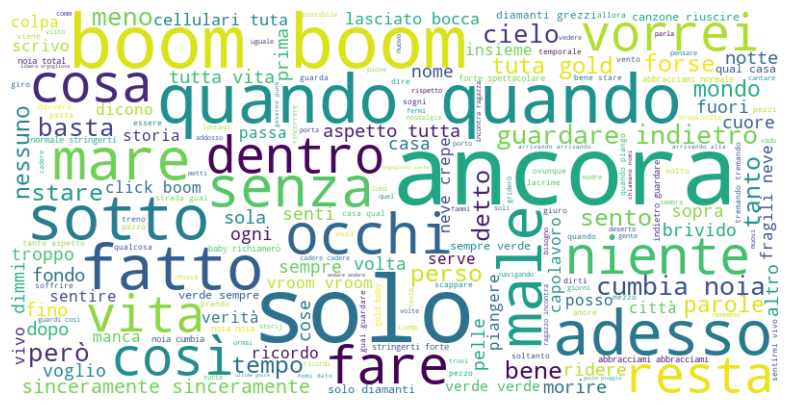

In [29]:
# Generate and display word cloud
wordcloud = WordCloud(width=800, height=400, max_font_size=100, background_color="white").generate(" ".join(tokens))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## 3. Sentiment

### 3.1 Pre processing

In [31]:
# Define the model tag for Italian emotion classification
model_tag = "MilaNLProc/feel-it-italian-emotion"

In [32]:
# Initialize text classification pipeline and tokenizer
text_classifier = pipeline("text-classification", model=model_tag, tokenizer=model_tag)
tokenizer = AutoTokenizer.from_pretrained(model_tag)

In [33]:
# Get a list of all text files in the 'testi/' directory
files = glob.glob("testi/*.txt")
song_names = []
labels = []

### 3.2 Defining sentiment for each song

In [34]:
# Process each text file
for file in files:
    f = open(file, "r")
    text = f.read().replace("’", "'").replace("\n", " ")
    f.close()
    
    # Tokenize and classify emotions for the text
    tokens = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=256)
    text = tokenizer.decode(tokens["input_ids"][0])
    c = text_classifier(text)
    labels.append(c[0]["label"])

    # Process song names for display
    song_name = os.path.basename(file).replace(".txt", "")
    song_name = song_name.replace("_", " ")
    song_name = song_name.replace("-", " - ")
    song_name = " ".join([word.capitalize() for word in song_name.split()])
    song_names.append(song_name)

In [35]:
# Print the emotion labels for each song
for i in range(len(song_names)):
    print(f"{labels[i]}: {song_names[i]}")

sadness: The Kolors - Un Ragazzo Una Ragazza
sadness: Il Tre - Fragili
sadness: Alessandra Amoroso - Fino A Qui
anger: Loredana Berte - Pazza
fear: Rose Villain - Click - Boom
joy: Il Volo - Capolavoro
sadness: Ghali - Casa Mia
sadness: Irama - Tu No
fear: Clara - Diamanti Grezzi
sadness: Dargen Damico - Onda Alta
anger: Bnkr44 - Governo Punk
sadness: Diodato - Ti Muovi
anger: Sangiovanni - Finiscimi
joy: Fiorella Mannoia - Mariposa
sadness: Mr Rain - Due Altalene
joy: Mannini - Spettacolare
sadness: Negramaro - Ricominciamo - Tutto
sadness: Gazzelle - Tutto Qui
sadness: Santi Francesi - Lamore In Bocca
sadness: Emma - Apnea
sadness: Ricchi E Povero - Ma Non Tutta La Vita
sadness: Bigmama - La Rabbia Non Ti Basta
fear: Annalisa - Sinceramente
sadness: La Sad - Autodistruttivo
sadness: Geolier - I P Me Tu P Te
sadness: Mahmood - Tuta Gold
sadness: Fred De Palma - Il Cielo Non Ci Vuole
sadness: Alfa - Vai
sadness: Angelina Mango - La Noia
anger: Renga Nek - Pazzo Di Te


In [37]:
# Calculate emotion counts
emotion_counts = {label: labels.count(label) for label in set(labels)}

In [38]:
# Calculate total number of songs
total_songs = len(labels)

In [39]:
# Calculate percentages for each emotion
emotion_percentages = {label: (count / total_songs) * 100 for label, count in emotion_counts.items()}

### 3.3 Emotion distribution

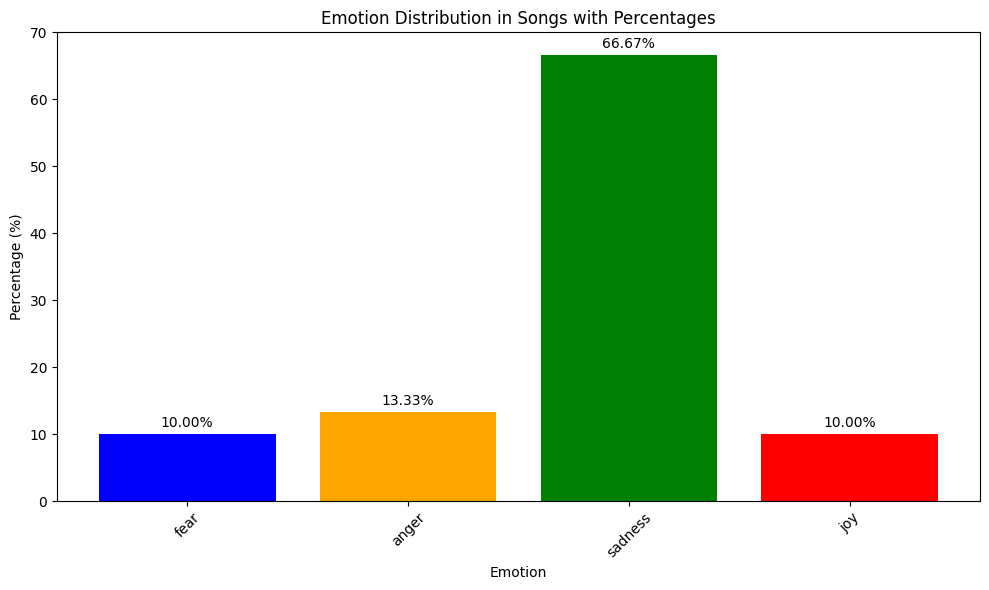

In [40]:
# Plot the bar graph with percentages
plt.figure(figsize=(10, 6))
colors = ['blue', 'orange', 'green', 'red', 'purple']
plt.bar(emotion_percentages.keys(), emotion_percentages.values(), color=colors)
plt.xlabel('Emotion')
plt.ylabel('Percentage (%)')
plt.title('Emotion Distribution in Songs with Percentages')
plt.xticks(rotation=45)

# Display percentages on top of each bar
for i, percentage in enumerate(emotion_percentages.values()):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center')

plt.tight_layout()
plt.show()

## 4. Analyze which artist is more articulate

### 4.1 Preprocessing

In [41]:
# Function to extract artist names from file names
def extract_artist_name(file):
    return file.split('/')[-1].split('-')[0]


In [42]:
# creation empty list
artists_unique_words = {}

In [43]:

for file in files:
    # Read text from each file
    with open(file, "r") as f:
        text = f.read().replace("’", "'").replace("\n", " ")

    # Tokenize text and remove stopwords
    stop_words = set(stopwords.words('italian'))
    words = word_tokenize(text.lower())
    unique_words = set([word for word in words if word.isalnum() and word not in stop_words])

    # Extract artist name from file name
    artist = extract_artist_name(file)

    # Count unique words for each artist
    if artist in artists_unique_words:
        artists_unique_words[artist] += len(unique_words)
    else:
        artists_unique_words[artist] = len(unique_words)

In [44]:
# Sort artists based on number of unique words and get top five
top_five_artists = dict(sorted(artists_unique_words.items(), key=lambda x: x[1], reverse=True)[:5])

### 4.2 Barplot top 5

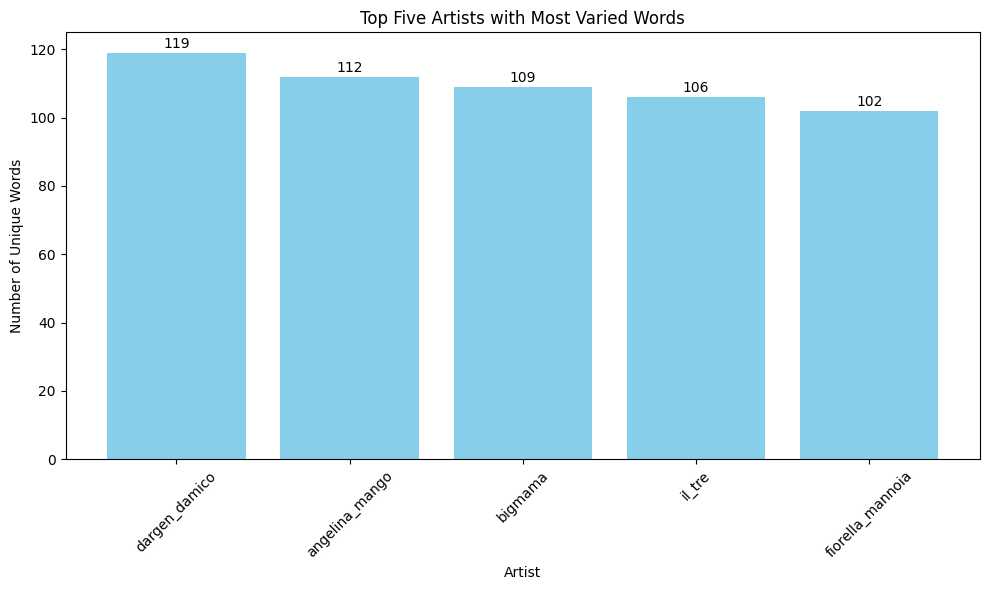

In [45]:
# Create a bar plot for the top five artists with most varied words including the number of words
plt.figure(figsize=(10, 6))
bars = plt.bar(top_five_artists.keys(), top_five_artists.values(), color='skyblue')

# Add labels with the number of unique words on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom')

plt.xlabel('Artist')
plt.ylabel('Number of Unique Words')
plt.title('Top Five Artists with Most Varied Words')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()